# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [44]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [45]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [46]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [47]:
fraud.shape

(1000000, 8)

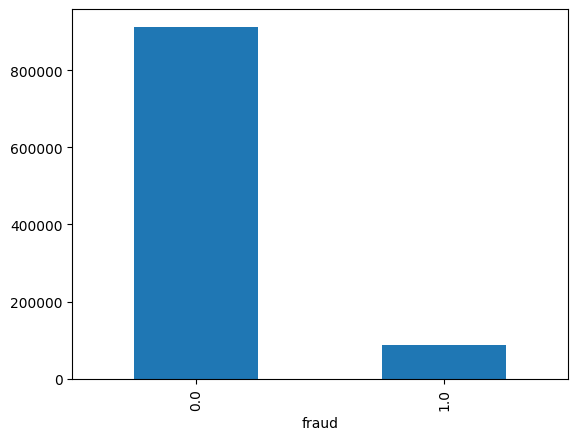

In [48]:
fraud_bal = fraud["fraud"].value_counts()
fraud_bal.plot(kind="bar")
plt.show()

### Q1: is dataset imbalanced
Yes, most values are in 0, we need to rebalance

In [49]:
def run_logistic_model(x_feature_data, y_label_data):
    log_reg = LogisticRegression()
    log_reg.fit(x_feature_data,  y_label_data)
    return log_reg

def eval_model(train_feature, train_label, test_feature, test_label):
    log_reg = run_logistic_model(train_feature, train_label)

    print(f'score: {log_reg.score(test_feature, test_label)}')

    pred = log_reg.predict(test_feature)
    print(classification_report(y_pred = pred, y_true = test_label))

    log_reg_confusion_matrix = confusion_matrix(test_label, pred)
    print(log_reg_confusion_matrix)

In [50]:
# Steps 2 & 3
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

eval_model(X_train_scaled, y_train, X_test_scaled, y_test)

score: 0.959012
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228273
         1.0       0.89      0.60      0.72     21727

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000

[[226662   1611]
 [  8636  13091]]


### Step 4 Oversample

In [51]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values

fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

yes_fraud_oversampled = resample(fraud,
                                    replace=True,
                                    n_samples = len(no_fraud),
                                    random_state=0)

train_over = pd.concat([yes_fraud_oversampled, no_fraud], ignore_index=True)

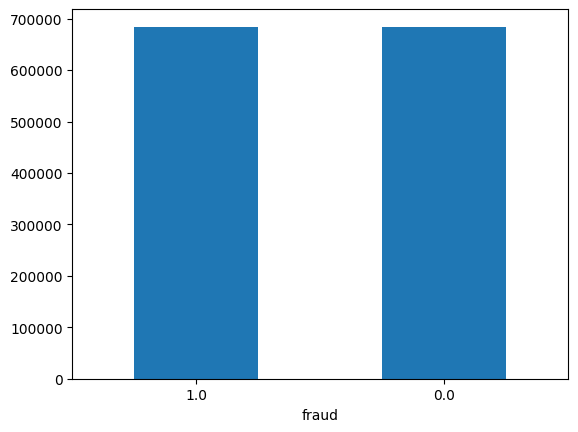

In [52]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar", rot=0)
plt.show()

In [53]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]
eval_model(X_train_over, y_train_over, X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


score: 0.934
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228273
         1.0       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

[[212887  15386]
 [  1114  20613]]


### Results:
The oversampling showed much improvement in recall, not much in f1 score, in fact more false positives are showing up

### Step 5 Undersampled

In [54]:
no_fraud_undersampled = resample(no_fraud,
                                    replace=False,
                                    n_samples = len(fraud),
                                    random_state=0)
train_under = pd.concat([no_fraud_undersampled, fraud])

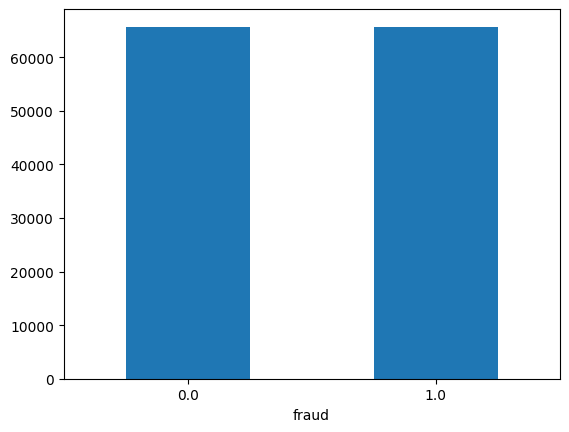

In [55]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar", rot=0)
plt.show()

In [56]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]
eval_model(X_train_under, y_train_under, X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


score: 0.9337
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228273
         1.0       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

[[212825  15448]
 [  1127  20600]]


### Results
Very simialr results to Oversampled: precision and f1 score not too good

### SMOTE Final Step

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [59]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

In [60]:
eval_model(X_train_sm, y_train_sm, X_test_scaled, y_test)

score: 0.934024
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228273
         1.0       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

[[212884  15389]
 [  1105  20622]]


### Results
Very similar results to oversampled and undersampled: precision and f1 score are not too good

### Overall
The sampling improved the recall score but not precision and f1 score did worse